Number of threads: 14
Number of vertices: 2708
Number of edges: 10556
Generating a permutation...
Runtime for permutation generation [sec]: 0.00191236


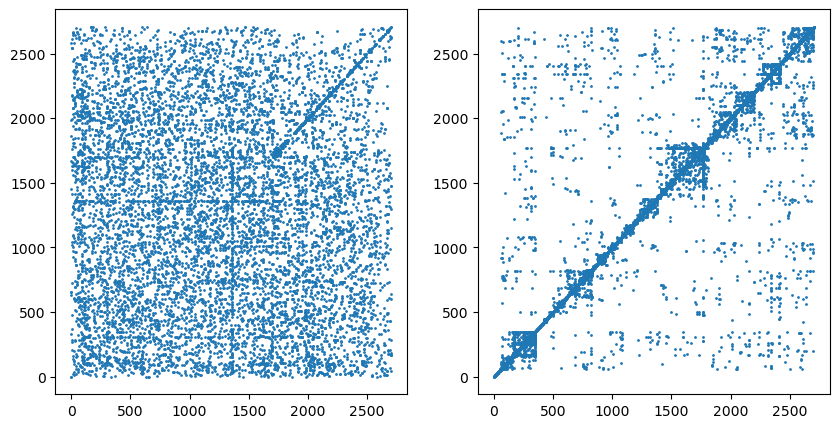

In [15]:
from pathlib import Path
import numpy as np
from scipy.sparse import coo_matrix
import torch
import rabbit
import matplotlib.pyplot as plt



fileset = Path('/home/xiexi/py_projects/OSDI21_AE/osdi-ae-graphs').rglob('*.npz')

n = 0

for i, file in enumerate(fileset):
    if file.stem != 'cora':
        continue
    # if i > 2:
    #     break
    
    graph_obj = np.load(file)
    src_li = graph_obj['src_li']
    dst_li = graph_obj['dst_li']
    num_nodes = graph_obj['num_nodes']
    num_edges = len(src_li)
    edge_index = np.stack([src_li, dst_li])
    val = [1] * num_edges
    scipy_coo = coo_matrix((val, edge_index), shape=(num_nodes, num_nodes))
    scipy_csr = scipy_coo.tocsr()

    # with open('./graphs/' + file.stem + '.config','w') as conf:
    #     conf.write(str(num_nodes) + " " + str(num_edges))
    # scipy_csr.indptr.astype(np.float32).tofile('./graphs/' + file.stem + '.graph.ptrdump')
    # scipy_csr.indices.astype(np.float32).tofile('./graphs/' + file.stem + '.graph.edgedump')
    fig = plt.figure(figsize = (10, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1.scatter(scipy_coo.row, scipy_coo.col, s=1)

    rabbit_edge_index = rabbit.reorder(torch.IntTensor(edge_index))

    rabbit_coo = coo_matrix((val, rabbit_edge_index), shape=(num_nodes, num_nodes))
    rabbit_csr = rabbit_coo.tocsr()

    ax2 = plt.subplot(1, 2, 2)
    ax2.scatter(rabbit_coo.row, rabbit_coo.col, s=1)

    # with open('./graphs/rabbit_' + file.stem + '.config','w') as conf:
    #     conf.write(str(num_nodes) + " " + str(num_edges))
    # rabbit_csr.indptr.astype(np.float32).tofile('./graphs/rabbit_' + file.stem + '.graph.ptrdump')
    # rabbit_csr.indices.astype(np.float32).tofile('./graphs/rabbit_' + file.stem + '.graph.edgedump')
    

